# 🐶 EDA - Classification de races de chiens

## Imports


In [48]:
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np

# Afficher où on est
print("Répertoire de travail actuel :", os.getcwd())

# Remonter si besoin
while not os.path.exists('data/processed/Images'):
    os.chdir('..')  # remonte d'un dossier
    print("Nouveau répertoire de travail :", os.getcwd())

Répertoire de travail actuel : c:\Users\Kraich\DEV\Python\DATA\dogs-ia\dog-classifier


## Chemin vers les images


In [49]:
DATA_DIR = "data/processed/Images"

## Récupération des classes

In [50]:
classes = sorted(os.listdir(DATA_DIR))
print(f"Nombre de races : {len(classes)}")
print(f"Exemples de races : {classes[:5]}")

Nombre de races : 120
Exemples de races : ['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu']


## Compter le nombre d'images par classe


In [51]:
class_counts = {}

for cls in classes:
    cls_dir = os.path.join(DATA_DIR, cls)
    n_images = len(os.listdir(cls_dir))
    class_counts[cls] = n_images
    print(f"{cls} : {n_images} images")

n02085620-Chihuahua : 152 images
n02085782-Japanese_spaniel : 185 images
n02085936-Maltese_dog : 252 images
n02086079-Pekinese : 149 images
n02086240-Shih-Tzu : 214 images
n02086646-Blenheim_spaniel : 188 images
n02086910-papillon : 196 images
n02087046-toy_terrier : 172 images
n02087394-Rhodesian_ridgeback : 172 images
n02088094-Afghan_hound : 239 images
n02088238-basset : 175 images
n02088364-beagle : 195 images
n02088466-bloodhound : 187 images
n02088632-bluetick : 171 images
n02089078-black-and-tan_coonhound : 159 images
n02089867-Walker_hound : 153 images
n02089973-English_foxhound : 157 images
n02090379-redbone : 148 images
n02090622-borzoi : 151 images
n02090721-Irish_wolfhound : 218 images
n02091032-Italian_greyhound : 182 images
n02091134-whippet : 187 images
n02091244-Ibizan_hound : 188 images
n02091467-Norwegian_elkhound : 196 images
n02091635-otterhound : 151 images
n02091831-Saluki : 200 images
n02092002-Scottish_deerhound : 232 images
n02092339-Weimaraner : 160 images
n02

## Visualisation : histogramme des classes

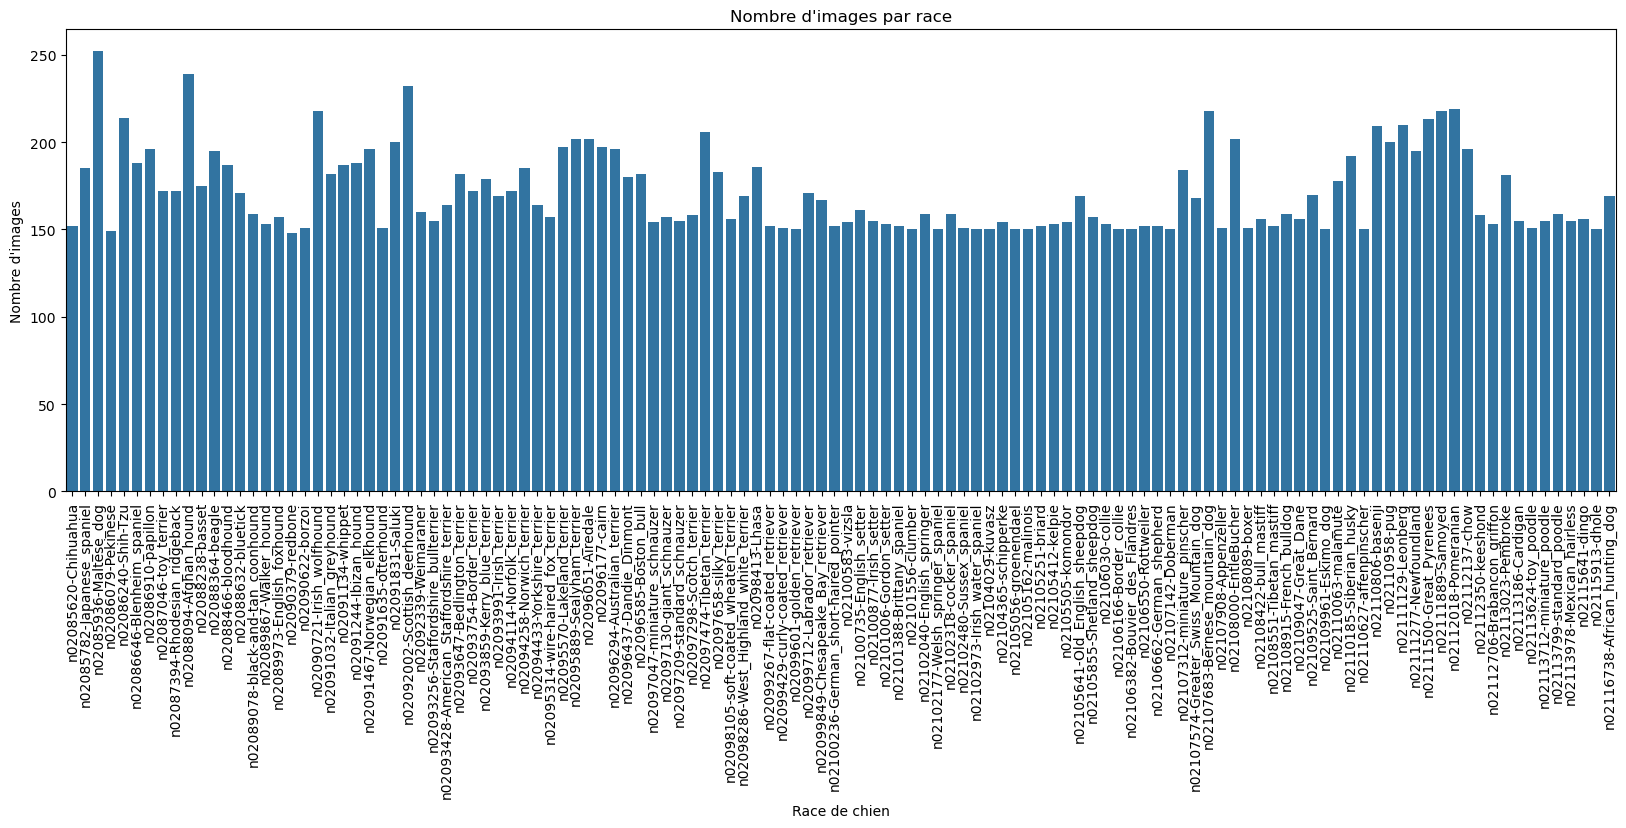

In [52]:
plt.figure(figsize=(20,6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(rotation=90)
plt.title("Nombre d'images par race")
plt.xlabel("Race de chien")
plt.ylabel("Nombre d'images")
plt.show()

## Visualisation de quelques images


In [53]:
def show_images(class_name, n_images=5):
    folder = os.path.join(DATA_DIR, class_name)
    images = random.sample(os.listdir(folder), n_images)

    plt.figure(figsize=(15,3))
    for idx, img_name in enumerate(images):
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path)

        plt.subplot(1, n_images, idx+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.show()


## Afficher 3 races au hasard


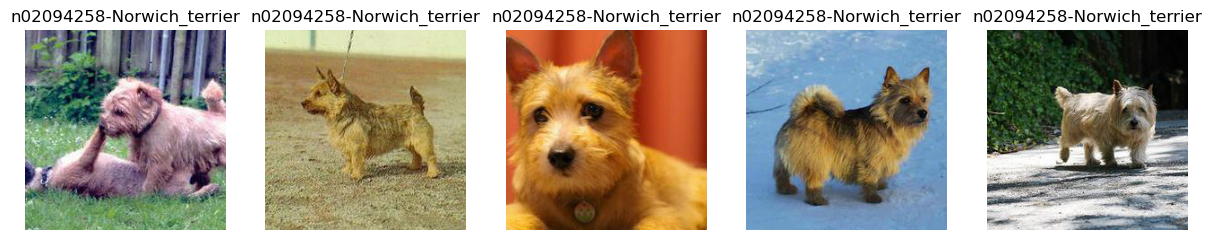

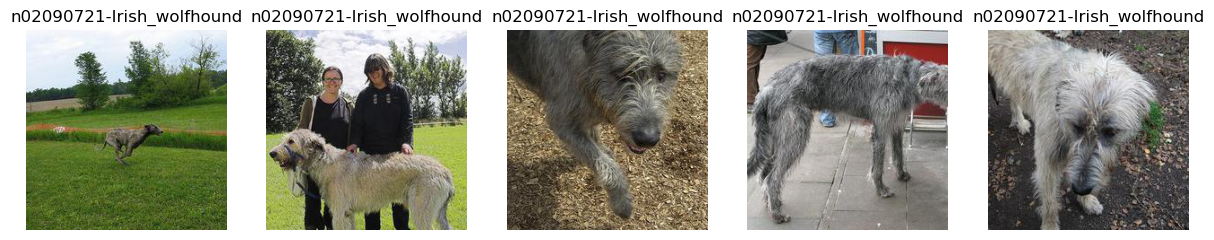

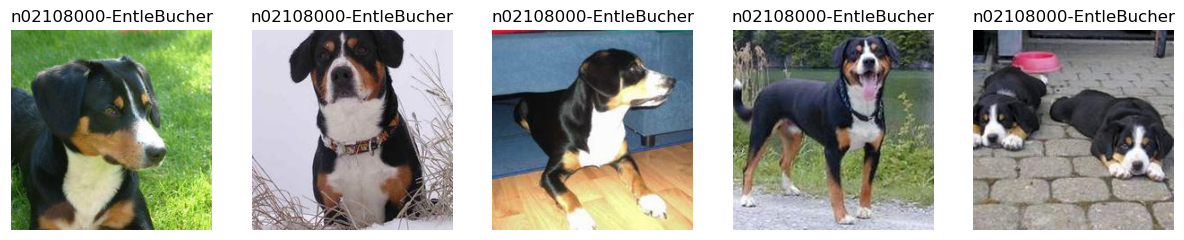

In [54]:
sample_classes = random.sample(classes, 3)
for cls in sample_classes:
    show_images(cls, n_images=5)

# ---------------------------------------------------------------------------
# 🎨 Vérification de la Data Augmentation
# ---------------------------------------------------------------------------

## Importation du script d'augmentation


In [ ]:
# Ensure the module is installed or the path is correct
import sys
sys.path.append('scripts/')

from augmentation_data import datagen, random_contrast

print(datagen)


## Sélectionner une image


In [56]:
sample_class = random.choice(classes)
sample_folder = os.path.join(DATA_DIR, sample_class)
sample_img_name = random.choice(os.listdir(sample_folder))
sample_img_path = os.path.join(sample_folder, sample_img_name)

## Charger l'image

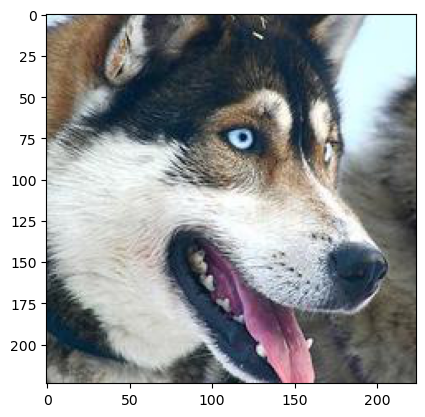

In [57]:
original_img = Image.open(sample_img_path)
plt.imshow(original_img)

## Appliquer augmentation

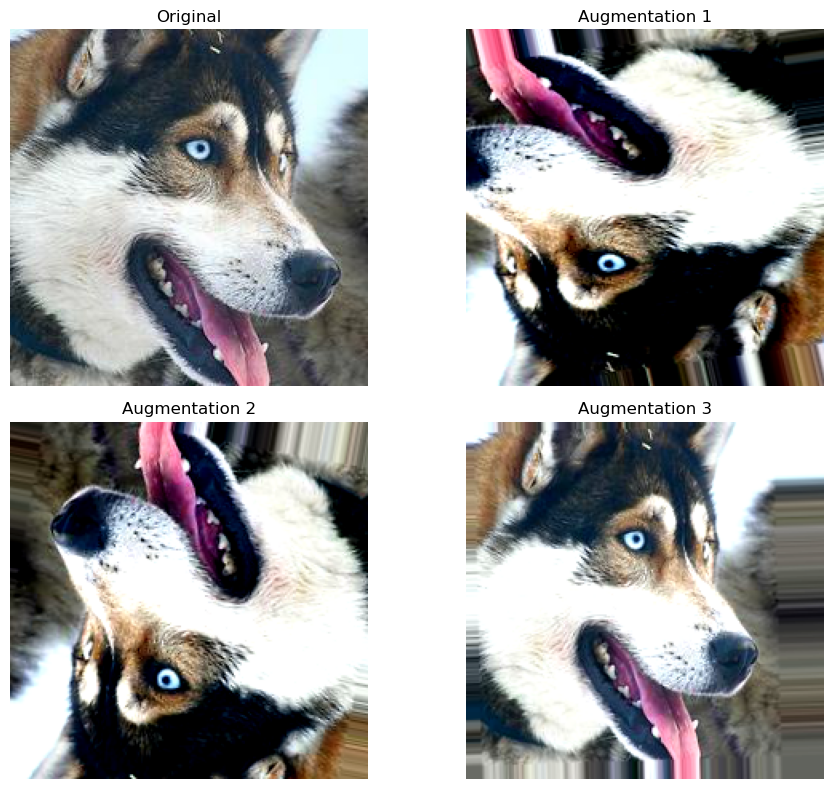

In [58]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Charger l'image correctement pour Keras
img_array = image.img_to_array(original_img)
img_array = np.expand_dims(img_array, axis=0)

# Appliquer datagen pour générer plusieurs augmentations
aug_iter = datagen.flow(img_array, batch_size=1)

# Générer 3 images augmentées
augmented_imgs = [next(aug_iter)[0] for _ in range(3)]

augmented_imgs_with_contrast = [random_contrast(aug_img) for aug_img in augmented_imgs]

# Afficher Original + Augmentations
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.imshow(img_array[0]/255.)
plt.title('Original')
plt.axis('off')

for idx, aug_img in enumerate(augmented_imgs_with_contrast):
    plt.subplot(2,2,idx+2)
    plt.imshow(np.clip(aug_img, 0, 1))
    plt.title(f'Augmentation {idx+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------------
# Observations
# ---------------------------------------------------------------------------

- Le dataset contient **120 races de chiens** différentes.
- Le nombre d'images par race est **relativement équilibré**, généralement compris entre **150 et 250 images** par race.
- Quelques légères variations existent : certaines races comme **le Maltese_dog** ou **le Samoyed** sont légèrement surreprésentées (~250 images), tandis que d'autres races sont juste au-dessus de 150 images.
- Les images ont été correctement **prétraitées** (redimensionnement à 224x224 pixels) avec une bonne qualité de conservation.
- La **data augmentation** est efficace : les images subissent des transformations réalistes (rotations, flips horizontaux, zooms, changements de luminosité) sans altérer l'identification visuelle des chiens.
- Aucun problème majeur d'images manquantes ou illisibles n'a été détecté pendant l'exploration.
- Conclusion : Le dataset est propre, équilibré et prêt à être utilisé pour l'entraînement d'un modèle de classification robuste.